# This notebook make csv files w/ grouped data for further analysis/modelling. 
- Running sql queries to aggregate the data takes a while due to large size of database.
- Do all aggreation here and save so we can just load csv files for analysis.

In [1]:
# import libraries 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# connect to database
con = sqlite3.connect("data/citibike_database.db3")

# set plot params to look nicer
plt.rcParams['figure.figsize'] = (14.0, 8.0)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3

# Total number of rides per year

In [2]:
query = "SELECT year, COUNT(*) as Nrides FROM rides GROUP BY year"
df_year = pd.read_sql_query(query,con)
df_year.head()

,year,Nrides
0,2013,5037185
1,2014,8081216
2,2015,9937969
3,2016,13845655
4,2017,2245988


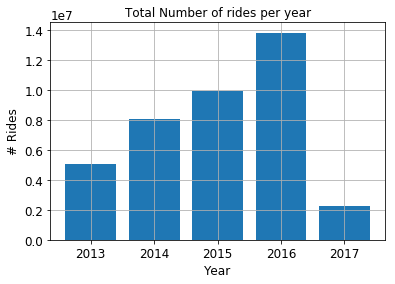

In [3]:
plt.bar(df_year.year,df_year.Nrides)
plt.grid()
plt.title("Total Number of rides per year")
plt.xlabel("Year")
plt.ylabel("# Rides");

In [4]:
# save to csv
df_year.to_csv('data/TotalRidesGroupedByYear.csv',index=False)

## Get total number of rides each day (target variable)

In [5]:
query = "SELECT year,month,day,wkday,COUNT(*) as Nrides FROM rides GROUP BY year,month,day"
df_rides = pd.read_sql_query(query,con)
df_rides['date'] = pd.to_datetime(df_rides[['year','month','day']])
#df_rides.drop(['year','month','day'],axis=1,inplace=True)
df_rides.head()


,year,month,day,wkday,Nrides,date
0,2013,7,1,0,16650,2013-07-01
1,2013,7,2,1,22745,2013-07-02
2,2013,7,3,2,21864,2013-07-03
3,2013,7,4,3,22326,2013-07-04
4,2013,7,5,4,21842,2013-07-05


In [6]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 6 columns):
year      1362 non-null int64
month     1362 non-null int64
day       1362 non-null int64
wkday     1362 non-null int64
Nrides    1362 non-null int64
date      1362 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 63.9 KB


## Plot to check data

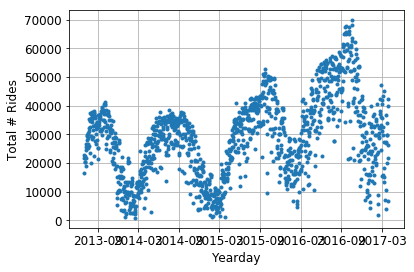

In [7]:
#plt.figure(figsize=(14,8))
plt.plot(df_rides.date, df_rides.Nrides,'.')
plt.grid()
plt.xlabel('Yearday')
plt.ylabel('Total # Rides');

In [8]:
# write to CSV 
df_rides.to_csv('data/TotalRidesGroupedByDate.csv',index=False)

# Number of rides per hour

In [9]:
query = "SELECT hour,COUNT(*) as Nrides FROM rides GROUP BY hour"
df_hour = pd.read_sql_query(query,con)
#df_hour['date'] = pd.to_datetime(df_hour[['year','month','day']])
#df_sta.drop(['year','month','day'],axis=1,inplace=True)
df_hour.head()

,hour,Nrides
0,0,372641
1,1,207887
2,2,123097
3,3,76074
4,4,71280


Text(0.5,1,'Total # Rides by hour, All Days')

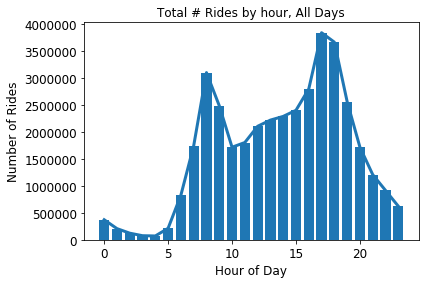

In [10]:
#plt.figure(figsize=(14,8))
plt.plot(df_hour.hour,df_hour.Nrides)
plt.bar(df_hour.hour,df_hour.Nrides)
plt.ylabel("Number of Rides")
plt.xlabel("Hour of Day")
plt.title("Total # Rides by hour, All Days")

In [11]:
df_hour.to_csv('data/TotalRidesGroupedByHour.csv',index=False)

# Number of rides per month

In [12]:
query = " SELECT year, month, COUNT(*) as Nrides FROM rides GROUP BY year,month"
df_month = pd.read_sql_query(query,con)
df_month.head()

,year,month,Nrides
0,2013,7,843416
1,2013,8,1001958
2,2013,9,1034359
3,2013,10,1037712
4,2013,11,675774


## Plot to check data

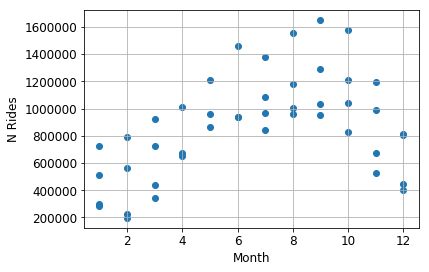

In [13]:
plt.scatter(df_month.month,df_month.Nrides)
plt.xlabel("Month")
plt.grid()
plt.ylabel("N Rides");

In [14]:
df_month.to_csv('data/NRidesGroupedByYearMonth.csv',index=False)

## Get number of distinct stations each day 

In [15]:
query = "SELECT year,month,day,COUNT(DISTINCT start_station_id) as N_stations FROM rides GROUP BY year,month,day"
df_sta = pd.read_sql_query(query,con)
df_sta['date'] = pd.to_datetime(df_sta[['year','month','day']])
df_sta.drop(['year','month','day'],axis=1,inplace=True)
df_sta.head()

,N_stations,date
0,326,2013-07-01
1,327,2013-07-02
2,326,2013-07-03
3,324,2013-07-04
4,325,2013-07-05


In [16]:
df_sta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 2 columns):
N_stations    1362 non-null int64
date          1362 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 21.4 KB


### Plot to check data

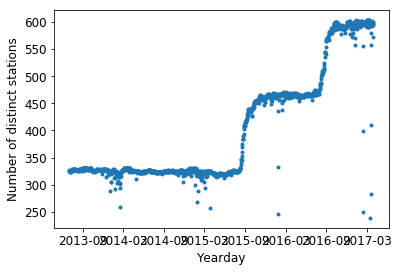

In [17]:
#plt.figure(figsize=(14,8))
plt.plot(df_sta.date, df_sta.N_stations,'.');
plt.xlabel('Yearday')
plt.ylabel('Number of distinct stations');

In [18]:
df_sta.to_csv('data/NDistinctStationsGroupedByDate.csv',index=False)

# Number of rides per day of week

In [19]:
query = "SELECT wkday, COUNT(*) as Nrides FROM rides GROUP BY wkday"
df_wkday = pd.read_sql_query(query,con)
df_wkday.head()

,wkday,Nrides
0,0,5722635
1,1,5964823
2,2,6261813
3,3,6085427
4,4,5847096


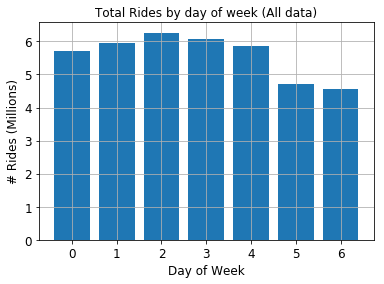

In [20]:
plt.bar(df_wkday.wkday,df_wkday.Nrides/1e6)
plt.xlabel("Day of Week")
plt.ylabel("# Rides (Millions)")
plt.title("Total Rides by day of week (All data)")
plt.grid();

In [21]:
df_wkday.to_csv('data/NridesGroupedByWkday.csv')

# N rides by wkday and year

In [22]:
query = "SELECT year, wkday, COUNT(*) as Nrides FROM rides GROUP BY year,wkday"
df_year_wkday = pd.read_sql_query(query,con)
df_year_wkday.head()

,year,wkday,Nrides
0,2013,0,722835
1,2013,1,774846
2,2013,2,777024
3,2013,3,729552
4,2013,4,746516


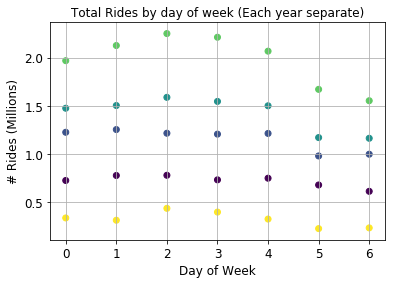

In [23]:
plt.scatter(df_year_wkday.wkday,df_year_wkday.Nrides/1e6,c=df_year_wkday.year)
#plt.legend()
plt.xlabel("Day of Week")
plt.ylabel("# Rides (Millions)")
plt.title("Total Rides by day of week (Each year separate)")
plt.grid();

In [24]:
df_wkday.to_csv('data/NridesGroupedByYearWkday.csv')